<h1>Applied Data Science Capstone

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

<h1>1. Introduction/Business Problem</h1> <a name="introduction"></a>

In this project, I will try to locate and recommend areas in Bangkok for <B>tourists</B> to be able to plan their visit suiting with their traveling styles.

Bangkok is a big and abundant capital city of Thailand which it has food, entertainment, night-life and etc. providing for foreign visitors. However, each district of Thailand has their own strength and interesting point to attract tourists.

This project points to solve problem as an asistance for tourists who want to prepare their plan for visiting Bangkok by providing district which suit with their travel styles. For example, a  tourist would like to visit to Thailand for eatting street food, the cluster will provide result about district which outstanding on noodle houses and Thai restaurant.

<h1>2. Data</h1><a name="data"></a>

Required data:
* <B>Districts in Bangkok, Thailand</B>
    * To define name and location of Bangkok city
    * Link https://en.wikipedia.org/wiki/List_of_districts_of_Bangkok
* <B>Information of venues in each district</B>
    * Retrieve from https://developer.foursquare.com/ (FourSquare)
    * Use information from the previous one to retrieve venues data in each district.
    * Including Venue, Venue Latitude, Venue Longitude and Venue Category
    * The Venue Category is a feature which can be used to analyse each district effectively, such as restaurants, hotels, coffee shops and etc.

The information after processing the data from two sources with a machine learning technique, <B>K-Means</B>, will be able to provide groups of distircts which are outstading on each attribute such as Thai restaurant or Pub. Based on the result of retrieving, we can provide suggestion on which district is suitable for each traveling style. <B>(The example of data provides below***)</B>

<h3>2.1 Retrieve Districts in Bangkok, Thailand, data</h3>

In [1]:
import pandas as pd
import numpy as np
import requests
import folium 
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from yellowbrick.cluster.elbow import KElbowVisualizer
print('Complete Lib Loading')

Complete Lib Loading


C:\Users\napat\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_districts_of_Bangkok')[0]
df.drop(['MapNr','Thai','No. ofSubdis-trictsKhwaeng'],axis=1,inplace=True)
df.rename(columns={'District(Khet)':'District'},inplace=True)
df.head()

,District,Post-code,Popu-lation,Latitude,Longitude
0,Bang Bon,10150,105161,13.659200,100.399100
1,Bang Kapi,10240,148465,13.765833,100.647778
2,Bang Khae,10160,191781,13.696111,100.409444
3,Bang Khen,10220,189539,13.873889,100.596389
4,Bang Kho Laem,10120,94956,13.693333,100.502500


Let try to fit and visualize the above data into Bangkok map with <B>Folium</B>

In [3]:
#Bangkok latitude and longitude
latitude = 13.736717
longitude = 100.523186

map_bkk = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['District']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='Green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bkk)  
    
map_bkk

<h3>2.2 Retrieve venues information from FourSquare

set parameter for using FourSquare

In [4]:
CLIENT_ID = ''
CLIENT_SECRET = ''
VERSION = '20200624'
LIMIT = 100
radius = 500

Retrieve information of venues in Bangkok

In [5]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return nearby_venues

In [6]:
bkk_venues = getNearbyVenues(names=df['District'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Bang Bon
Bang Kapi
Bang Khae
Bang Khen
Bang Kho Laem
Bang Khun Thian
Bang Na
Bang Phlat
Bang Rak
Bang Sue
Bangkok Noi
Bangkok Yai
Bueng Kum
Chatuchak
Chom Thong
Din Daeng
Don Mueang
Dusit
Huai Khwang
Khan Na Yao
Khlong Sam Wa
Khlong San
Khlong Toei
Lak Si
Lat Krabang
Lat Phrao
Min Buri
Nong Chok
Nong Khaem
Pathum Wan
Phasi Charoen
Phaya Thai
Phra Khanong
Phra Nakhon
Pom Prap Sattru Phai
Prawet
Rat Burana
Ratchathewi
Sai Mai
Samphanthawong
Saphan Sung
Sathon
Suan Luang
Taling Chan
Thawi Watthana
Thon Buri
Thung Khru
Wang Thonglang
Watthana
Yan Nawa


<h3>2.3 Dataset Exploration

In [7]:
bkk_venues.head()

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bang Bon,13.6592,100.3991,ขาหมูบางหว้า,13.657136,100.395230,Thai Restaurant
1,Bang Bon,13.6592,100.3991,Irashaimase Japanese Restaurant,13.658358,100.401403,Japanese Restaurant
2,Bang Bon,13.6592,100.3991,Lotus Express (โลตัส เอ็กซ์เพรส),13.657839,100.397243,Convenience Store
3,Bang Bon,13.6592,100.3991,บ้านพลูหลวง,13.658532,100.398442,Thai Restaurant
4,Bang Bon,13.6592,100.3991,Lotus Express Bongbon,13.657630,100.397325,Grocery Store


From the above table, we can extract venues data into a dataframce. On the columns, we have :'District', 'District Latitude', 'District Longitude', 'Venue',
'Venue Latitude', 'Venue Longitude' and  'Venue Category'

Let see the top 10 districts which have the highest number of venue in its.

In [8]:
bkk_venues['District'].value_counts().to_frame().head(10)

,District
Phaya Thai,84
Pathum Wan,76
Khlong San,50
Watthana,48
Khan Na Yao,46
Ratchathewi,41
Pom Prap Sattru Phai,41
Sathon,41
Bang Khun Thian,39
Phasi Charoen,39


Let explore the Venue Category we got from FourSquare

In [9]:
print('There are {} uniques categories.'.format(len(bkk_venues['Venue Category'].unique())))

There are 163 uniques categories.


In [10]:
pd.set_option('display.max_rows', None)
bkk_venues['Venue Category'].value_counts().to_frame()

,Venue Category
Noodle House,126
Thai Restaurant,73
Coffee Shop,72
Convenience Store,70
Café,56
Asian Restaurant,42
Japanese Restaurant,31
Chinese Restaurant,31
Hotel,27
Dessert Shop,26


From observing the dataset, we found that there are lots of duplicate category which are specify with their synonyms. So we have to group them, and clear irrelevant categories on tourism

<h1> 3. Methodology</h1><a name="methodology"></a>

In this project, we would like to know outstanding point of each area from clustering analysis. Regarding to limit of my computer performance, I use the data from only 500 meters from the center of each district in Bangkok,Thailand.

* At first, I will clean my venue dataset by merging all synonyms of each venue, and drop a list of venues which it is not relavent with my problem field (guiding tourism).

* The next step is converting venue data into mean of venue in each district as a feature list for clustering model

* The thrid step is creating clustering model using K-means clustering.. To optimise the clustering technique, I will perform <B>Elbow analysis</B> to find best K for K-means clustering.

* The Last is preparing the clustering data into the form for the analysis step.

<h3>3.1 Data preprocessing</h3>

Merging the duplicate Venue Categories

In [11]:
clean =bkk_venues.copy()
clean.replace(clean[clean['Venue Category'].str.contains("Bar|Pub|Other Nightlife|Nightclub|bar")]['Venue Category'].unique(), 'Bar',inplace=True)
coffee = ['Coffee Shop','Café','Cafeteria','cafe','Tea Room']
dessert = ['Dessert Shop','Bakery','Ice Cream Shop','Snack Place']
healthcare =['Massage Studio', 'Spa','Health & Beauty Service']
shop = clean[clean['Venue Category'].str.contains("Shop")]['Venue Category'].unique()[1:]
store = clean[clean['Venue Category'].str.contains("Store|store|Organic")]['Venue Category'].unique()[1:]
residence = ['Hotel','Bed & Breakfast','Resort','Residential Building (Apartment / Condo)','Hostel','Hotel Pool']
Tourist_attraction = ['Historic Site','Museum','History Museum','Canal','Harbor / Marina','Pier','Monument / Landmark','Pedestrian Plaza','Art Gallery']
park = ['Park','Garden Center','Dog Run','Playground','Garden']
Entertainment = ['Theater','Jazz Club','Movie Theater','Music Venue','Gaming Cafe']
sport = ['Gym / Fitness Center','Badminton Court','Stadium','Pool','Sports Club	','Soccer Field	','Golf Driving Range','Skate Park','Bowling Alley','Gym','Skating Rink','Boxing Gym','Sports Club']
th_res = ['Thai Restaurant' , 'Som Tum Restaurant' , 'Food Court' , 'Food & Drink Shop']
jp_res = ['Japanese Restaurant' , 'Shabu-Shabu Restaurant' , 'Ramen Restaurant' , 'Sushi Restaurant' , 'Udon Restaurant' , 'Tonkatsu Restaurant' , 'Donburi Restaurant' , 'Japanese Curry Restaurant']
as_res = ['Asian Restaurant' , 'Vietnamese Restaurant' , 'Korean Restaurant']
ch_res = ['Chinese Restaurant' , 'Dim Sum Restaurant', 'Dumpling Restaurant' , 'Cantonese Restaurant']
w_res = ['Fast Food Restaurant' , 'Mexican Restaurant' , 'American Restaurant' , 'Italian Restaurant' , 'Mediterranean Restaurant' , 'French Restaurant' , 'German Restaurant' , 'Steakhouse' , 'Pizza Place' , 'Fried Chicken Joint','Burger Joint' , 'Salad Place'] 
o_res =['Restaurant' , 'Bistro' , 'Food' , 'Food Truck' , 'Soup Place' , 'Breakfast Spot' , 'Diner', 'Comfort Food Restaurant', 'Buffet','Vegetarian / Vegan Restaurant', 'Satay Restaurant', 'Halal Restaurant'] 
clean.replace(th_res, 'Thai Restaurant',inplace=True)
clean.replace(jp_res, 'Japanese Restaurant',inplace=True)
clean.replace(as_res, 'Asian Restaurant',inplace=True)
clean.replace(ch_res, 'Chinese Restaurant',inplace=True)
clean.replace(w_res, 'Western Restaurant',inplace=True)
clean.replace(o_res, 'Other Restaurant',inplace=True)
clean.replace(Tourist_attraction, 'Tourist_attraction',inplace=True)
clean.replace(park, 'Park',inplace=True)
clean.replace(Entertainment, 'Entertainment',inplace=True)
clean.replace(residence, 'Residence',inplace=True)
clean.replace(sport, 'Sport place',inplace=True)
clean.replace('Department Store', 'Shopping Mall',inplace=True)
clean.replace(coffee, 'Coffee',inplace=True)
clean.replace(dessert, 'Dessert',inplace=True)
clean.replace(healthcare, 'Healthcare',inplace=True)
clean.replace(clean[clean['Venue Category'].str.contains("Market|market")]['Venue Category'].unique(), 'Market',inplace=True)
clean.replace(shop, 'Small Shop',inplace=True)
clean.replace(store, 'Small Shop',inplace=True)
clean['Venue Category'].value_counts().to_frame()

,Venue Category
Coffee,135
Noodle House,126
Thai Restaurant,103
Western Restaurant,72
Convenience Store,70
Small Shop,61
Japanese Restaurant,59
Dessert,55
Asian Restaurant,49
Other Restaurant,45


After merging the duplicates, I figure out that there are irrelavant venues to my problem field from venue frequency less than 8. So, I will drop all them from my venue dataset.

In [12]:
temp = clean['Venue Category'].value_counts().to_frame()
index = temp[temp['Venue Category'] < 8].index.to_series().tolist()
venues = clean.copy()
venues = venues[~(venues['Venue Category'].isin(index))]
venues['Venue Category'].value_counts().to_frame()

,Venue Category
Coffee,135
Noodle House,126
Thai Restaurant,103
Western Restaurant,72
Convenience Store,70
Small Shop,61
Japanese Restaurant,59
Dessert,55
Asian Restaurant,49
Other Restaurant,45


So at this step, we got the clean dataset without duplicates and irrelavant categories in my problem field.

<h3>3.2 Producing a feature list</h3>

Performing one hot technique to convert catagorical data into integer data.

In [13]:
bkk_onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")
bkk_onehot['District'] = venues['District'] 
fixed_columns = [bkk_onehot.columns[-1]] + list(bkk_onehot.columns[:-1]) 
#the last column + the enitire columns before the last
bkk_onehot = bkk_onehot[fixed_columns]
bkk_onehot.head()

,District,Asian Restaurant,BBQ Joint,Bar,Chinese Restaurant,Coffee,Convenience Store,Dessert,Entertainment,Healthcare,...,Noodle House,Other Restaurant,Park,Residence,Seafood Restaurant,Small Shop,Sport place,Thai Restaurant,Tourist_attraction,Western Restaurant
0,Bang Bon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Bang Bon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bang Bon,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bang Bon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Bang Bon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Now we get the one hot data of each venue in their district. Let convert this data into overview of each district by grouping the data and represent mean frequency of each feature.

In [14]:
bkk_grouped = bkk_onehot.groupby('District').mean().reset_index()
print('shape => ',bkk_grouped.shape)
bkk_grouped.head()

shape =>  (50, 23)


,District,Asian Restaurant,BBQ Joint,Bar,Chinese Restaurant,Coffee,Convenience Store,Dessert,Entertainment,Healthcare,...,Noodle House,Other Restaurant,Park,Residence,Seafood Restaurant,Small Shop,Sport place,Thai Restaurant,Tourist_attraction,Western Restaurant
0,Bang Bon,0.000000,0.000000,0.0,0.000000,0.000000,0.142857,0.142857,0.0,0.000000,...,0.142857,0.000000,0.000000,0.0,0.000000,0.142857,0.0,0.285714,0.000000,0.000000
1,Bang Kapi,0.000000,0.055556,0.0,0.000000,0.055556,0.111111,0.000000,0.0,0.055556,...,0.277778,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.111111,0.055556,0.000000
2,Bang Khae,0.100000,0.100000,0.0,0.000000,0.100000,0.200000,0.000000,0.0,0.000000,...,0.100000,0.000000,0.000000,0.0,0.000000,0.100000,0.0,0.000000,0.000000,0.100000
3,Bang Khen,0.230769,0.000000,0.0,0.000000,0.000000,0.153846,0.000000,0.0,0.000000,...,0.230769,0.000000,0.230769,0.0,0.000000,0.076923,0.0,0.076923,0.000000,0.000000
4,Bang Kho Laem,0.058824,0.000000,0.0,0.117647,0.117647,0.058824,0.000000,0.0,0.000000,...,0.176471,0.058824,0.000000,0.0,0.058824,0.058824,0.0,0.117647,0.000000,0.058824


<h3>3.3 Clustering</h3>

Let find the optimum K for K-means clustering

In [15]:
bkk_grouped_clustering = bkk_grouped.drop('District', axis = 1)
bkk_grouped_clustering.head()

,Asian Restaurant,BBQ Joint,Bar,Chinese Restaurant,Coffee,Convenience Store,Dessert,Entertainment,Healthcare,Hotpot Restaurant,...,Noodle House,Other Restaurant,Park,Residence,Seafood Restaurant,Small Shop,Sport place,Thai Restaurant,Tourist_attraction,Western Restaurant
0,0.000000,0.000000,0.0,0.000000,0.000000,0.142857,0.142857,0.0,0.000000,0.000000,...,0.142857,0.000000,0.000000,0.0,0.000000,0.142857,0.0,0.285714,0.000000,0.000000
1,0.000000,0.055556,0.0,0.000000,0.055556,0.111111,0.000000,0.0,0.055556,0.055556,...,0.277778,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.111111,0.055556,0.000000
2,0.100000,0.100000,0.0,0.000000,0.100000,0.200000,0.000000,0.0,0.000000,0.000000,...,0.100000,0.000000,0.000000,0.0,0.000000,0.100000,0.0,0.000000,0.000000,0.100000
3,0.230769,0.000000,0.0,0.000000,0.000000,0.153846,0.000000,0.0,0.000000,0.000000,...,0.230769,0.000000,0.230769,0.0,0.000000,0.076923,0.0,0.076923,0.000000,0.000000
4,0.058824,0.000000,0.0,0.117647,0.117647,0.058824,0.000000,0.0,0.000000,0.058824,...,0.176471,0.058824,0.000000,0.0,0.058824,0.058824,0.0,0.117647,0.000000,0.058824


bringing the label(district) out of the dataset to prepare for a list of feature performing with  the clustering

To find the K value, I leverage KElbowVisualizer library.

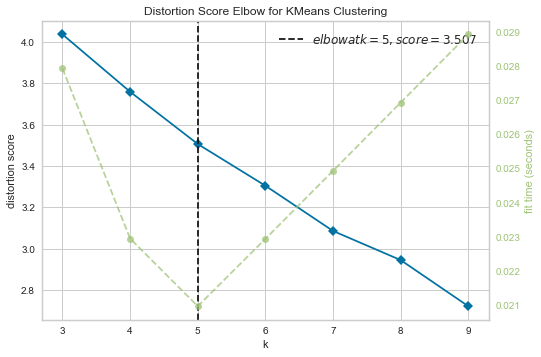

In [16]:
visualizer = KElbowVisualizer(KMeans(random_state=0), k=(3,10))
visualizer.fit(bkk_grouped_clustering) 
visualizer.show()

From the library , it provided the detected elbow point (optimum K) equal to 12. So will use this K in k-means clustring for analysis

In [17]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=0).fit(bkk_grouped_clustering)

<H3>3.4 Preparing clustering data for analysis

In [18]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False) #sort data according to float
    return row_categories_sorted.index.values[0:num_top_venues] # return values from 0 to specified # (string valaue "index.values")

Represent the most common venue in each district

In [19]:
num_top_venues = 5
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['District'] = bkk_grouped['District']
for ind in np.arange(bkk_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bkk_grouped.iloc[ind, :], num_top_venues)
neighborhoods_venues_sorted.head()

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Bang Bon,Thai Restaurant,Japanese Restaurant,Small Shop,Convenience Store,Noodle House
1,Bang Kapi,Noodle House,Japanese Restaurant,Thai Restaurant,Convenience Store,Market
2,Bang Khae,Convenience Store,Western Restaurant,Noodle House,BBQ Joint,Coffee
3,Bang Khen,Asian Restaurant,Park,Noodle House,Convenience Store,Thai Restaurant
4,Bang Kho Laem,Noodle House,Thai Restaurant,Chinese Restaurant,Coffee,Western Restaurant


Let add the clustering result into the table for analysis phase

In [20]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted.head()

,Cluster Labels,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,0,Bang Bon,Thai Restaurant,Japanese Restaurant,Small Shop,Convenience Store,Noodle House
1,1,Bang Kapi,Noodle House,Japanese Restaurant,Thai Restaurant,Convenience Store,Market
2,0,Bang Khae,Convenience Store,Western Restaurant,Noodle House,BBQ Joint,Coffee
3,1,Bang Khen,Asian Restaurant,Park,Noodle House,Convenience Store,Thai Restaurant
4,1,Bang Kho Laem,Noodle House,Thai Restaurant,Chinese Restaurant,Coffee,Western Restaurant


In [21]:
bkk_merged = df
bkk_merged = bkk_merged.join(neighborhoods_venues_sorted.set_index('District'), on='District')
bkk_merged.head()

,District,Post-code,Popu-lation,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Bang Bon,10150,105161,13.659200,100.399100,0,Thai Restaurant,Japanese Restaurant,Small Shop,Convenience Store,Noodle House
1,Bang Kapi,10240,148465,13.765833,100.647778,1,Noodle House,Japanese Restaurant,Thai Restaurant,Convenience Store,Market
2,Bang Khae,10160,191781,13.696111,100.409444,0,Convenience Store,Western Restaurant,Noodle House,BBQ Joint,Coffee
3,Bang Khen,10220,189539,13.873889,100.596389,1,Asian Restaurant,Park,Noodle House,Convenience Store,Thai Restaurant
4,Bang Kho Laem,10120,94956,13.693333,100.502500,1,Noodle House,Thai Restaurant,Chinese Restaurant,Coffee,Western Restaurant


<h1>4. Analysis</h1><a name="analysis"></a>

This section provide analysis of each cluster after data is clustered into five specific group using K-means clustering technique.

<h3>4.1 Cluster 0</h3>

In [22]:
bkk_merged.loc[bkk_merged['Cluster Labels'] == 0, bkk_merged.columns[[0] + list(range(5, bkk_merged.shape[1]))]]

,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Bang Bon,0,Thai Restaurant,Japanese Restaurant,Small Shop,Convenience Store,Noodle House
2,Bang Khae,0,Convenience Store,Western Restaurant,Noodle House,BBQ Joint,Coffee
5,Bang Khun Thian,0,Small Shop,Western Restaurant,Dessert,Japanese Restaurant,Sport place
14,Chom Thong,0,Western Restaurant,Thai Restaurant,Coffee,Hotpot Restaurant,BBQ Joint
19,Khan Na Yao,0,Japanese Restaurant,Western Restaurant,Dessert,Thai Restaurant,Coffee
23,Lak Si,0,Coffee,Western Restaurant,Thai Restaurant,Market,Japanese Restaurant
28,Nong Khaem,0,Western Restaurant,Thai Restaurant,Dessert,Market,Hotpot Restaurant
29,Pathum Wan,0,Convenience Store,Noodle House,Thai Restaurant,Dessert,Asian Restaurant
30,Phasi Charoen,0,Japanese Restaurant,Western Restaurant,Small Shop,Coffee,BBQ Joint
32,Phra Khanong,0,Western Restaurant,Convenience Store,Residence,Coffee,Dessert


<p>Overview: This group of clusters is districts that stand out on food, especially on foreign food. from most common on 2 and 3 mostly are Western Restaurant followed by coffee and Japanese Restaurant.</p>
<p>Recommend: These districts suit for people who want to try western food in Thailand and these areas also have coffee cafes for chilling after your meal.</p>

<h3>4.3 Cluster 1</h3>

In [23]:
bkk_merged.loc[bkk_merged['Cluster Labels'] == 1, bkk_merged.columns[[0] + list(range(5, bkk_merged.shape[1]))]]

,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Bang Kapi,1,Noodle House,Japanese Restaurant,Thai Restaurant,Convenience Store,Market
3,Bang Khen,1,Asian Restaurant,Park,Noodle House,Convenience Store,Thai Restaurant
4,Bang Kho Laem,1,Noodle House,Thai Restaurant,Chinese Restaurant,Coffee,Western Restaurant
6,Bang Na,1,Asian Restaurant,Coffee,Noodle House,Chinese Restaurant,Seafood Restaurant
8,Bang Rak,1,Noodle House,Residence,Thai Restaurant,Chinese Restaurant,Bar
10,Bangkok Noi,1,Noodle House,Coffee,Thai Restaurant,Western Restaurant,Park
11,Bangkok Yai,1,Noodle House,Asian Restaurant,Coffee,Dessert,Market
12,Bueng Kum,1,Asian Restaurant,Small Shop,Other Restaurant,Noodle House,Healthcare
17,Dusit,1,Noodle House,Asian Restaurant,Thai Restaurant,Coffee,Convenience Store
18,Huai Khwang,1,Noodle House,Residence,Asian Restaurant,Thai Restaurant,Other Restaurant


<p>Overview: This group of clusters is districts that stand out on street food and traditional Thai food from most common on 1st, 2nd and 3rd mostly are Noodle House and Asian Restaurant followed by Thai Restaurant.</p>
<p>Recommend: These districts suit for people who want to taste street food and traditional Thai.</p>

<h3>4.3 Cluster 2</h3>

In [24]:
bkk_merged.loc[bkk_merged['Cluster Labels'] == 2, bkk_merged.columns[[0] + list(range(5, bkk_merged.shape[1]))]]

,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
7,Bang Phlat,2,Convenience Store,Bar,Western Restaurant,Coffee,Residence
9,Bang Sue,2,Thai Restaurant,Noodle House,Coffee,Sport place,Seafood Restaurant
13,Chatuchak,2,Coffee,Thai Restaurant,Sport place,Bar,Residence
20,Khlong Sam Wa,2,Japanese Restaurant,Thai Restaurant,Bar,Chinese Restaurant,Coffee
21,Khlong San,2,Small Shop,Coffee,Dessert,Thai Restaurant,Chinese Restaurant
22,Khlong Toei,2,Bar,Tourist_attraction,Western Restaurant,Thai Restaurant,Hotpot Restaurant
24,Lat Krabang,2,Thai Restaurant,Western Restaurant,Other Restaurant,Coffee,Market
25,Lat Phrao,2,Thai Restaurant,Coffee,Noodle House,Small Shop,Western Restaurant
26,Min Buri,2,Coffee,Thai Restaurant,Small Shop,Western Restaurant,Hotpot Restaurant
27,Nong Chok,2,Small Shop,Market,Thai Restaurant,Park,Convenience Store


<p>Overview: This group of clusters is districts which stand out on beverage shop. From the table, Coffee shop and Bar, beverage shop, are most members of this cluster, and the number of Thai restaurants just come after the beverage shop.</p>
<p>Recommend: These districts suit for people who want to taste coffee and other kinds of beverages in Thailand, and this area also has Thai restaurants to welcome visitors.</p>

<h3>4.4 Cluster 3

In [25]:
bkk_merged.loc[bkk_merged['Cluster Labels'] == 3, bkk_merged.columns[[0] + list(range(5, bkk_merged.shape[1]))]]

,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
16,Don Mueang,3,Other Restaurant,Convenience Store,Healthcare,Thai Restaurant,Residence
35,Prawet,3,Convenience Store,Other Restaurant,Noodle House,Western Restaurant,Hotpot Restaurant
44,Thawi Watthana,3,Convenience Store,Asian Restaurant,Other Restaurant,Healthcare,Thai Restaurant


<p>Overview: This cluster has common venues on Convenience Store and Healthcare-service, these areas may be areas for working which are not suited for traveling</p>
<p>Recommend: these areas are not recommended on visiting, however, this cluster has Healthcare-service (i.e, massage and spa), so this would be matched for travelers who want to try famous Thai massage in its origin</p>

<h3>4.5 Cluster 4

In [26]:
bkk_merged.loc[bkk_merged['Cluster Labels'] == 4, bkk_merged.columns[[0] + list(range(5, bkk_merged.shape[1]))]]

,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
15,Din Daeng,4,Sport place,Convenience Store,Residence,Park,Western Restaurant
40,Saphan Sung,4,Japanese Restaurant,Thai Restaurant,Sport place,Convenience Store,Hotpot Restaurant


<p>Overview: This cluster does not have any outstanding attributes, so I guess this is resident zones of local people from having high numbers of sport places and convenience stores which they are the most commonplace Thai people usually visiting.</p>
<p>Recommend: these areas are not recommended for visiting.</p>

Let visualize the area of all clusters before going to the next bullet.

In [27]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bkk_merged['Latitude'], bkk_merged['Longitude'], bkk_merged['District'], bkk_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<h1>5. Results and Discussion</h1><a name="results"></a>

<p>From the analysis, I found that there are three outstanding clusters on the Western restaurant, street food and traditional Thai, and beverage on cluster zero, one and two, respectively. On number three cluster is not very outstanding in any venue but if comparing this cluster to the other clusters, the cluster has a higher number of healthcare venues more than the others. So, the cluster can be assumed to be outstanding from the other in the healthcare field. In the last cluster, there is no outstanding attribute exist so districts in this cluster are not recommended for traveling.</p>

<p>From the result, it can be seen that the cluster technique can only provide and clustering information based on restaurant categories. This because of imbalanced data.</p>

In [28]:
venues['Venue Category'].value_counts().to_frame().head(10)

,Venue Category
Coffee,135
Noodle House,126
Thai Restaurant,103
Western Restaurant,72
Convenience Store,70
Small Shop,61
Japanese Restaurant,59
Dessert,55
Asian Restaurant,49
Other Restaurant,45


<p>According to the table, Restaurant and beverage data overwhelm most of the top ten frequency of the dataset. So, when we perform analyst tables the data frequently provide restaurant and coffee on top 5 most common venues on the districts. </p>
<p>To figure out the problem, we can use the bigger dataset by retrieving the higher number of <b>the radius</b> when using FourSquare, because I only collected only venues located within 500 meters (radius = 500) from the center of each district.</p>
<p>However, the nature of Bangkok city is a standing out on food which people mostly come to Bangkok for the reason of tasting street food. In addition, Bangkok does have only a few tourist attractions for tourism. Therefore, this could be the reason why gathering data mostly consists of restaurant data.</p>

<h1>6. Conclusion</h1><a name="conclusion"></a>

This project point to solve the problem of tourists who want to plan their visit to Bangkok, Thailand, by using results of cluster analysis to help as assistance in making decisions on planning their vacation. The analysis results are from analyzing the clustering result from K-means (k=5 which is picked from using the elbow technique). Then, the result will provide outstanding attributes of each cluster, containing a district list, so tourist can pick the cluster that suits for their traveling style.

In future work, this data is not to provide the dominant conclusion on clustering analysis. because I just use only from a dataset from FourSquare which setting the radius equal to 500 meters which is a small number. So, it would be able to find more useful insight from the same methodology but a bigger dataset.